## 신경망 개요
### 텐서플로 MNIST

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('./mnist/data/', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
dir(mnist.train)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_epochs_completed',
 '_images',
 '_index_in_epoch',
 '_labels',
 '_num_examples',
 'epochs_completed',
 'images',
 'labels',
 'next_batch',
 'num_examples']

In [6]:
mnist.train.images.shape, mnist.train.labels.shape

((55000, 784), (55000, 10))

In [7]:
mnist.test.images.shape, mnist.test.labels.shape

((10000, 784), (10000, 10))

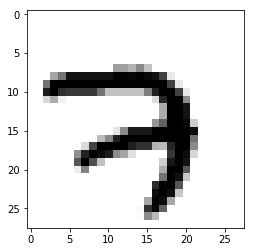

In [10]:
plt.imshow(mnist.train.images[0].reshape(28,28), cmap='gray_r')

In [12]:
mnist.train.images.max(), mnist.train.images.min()

(1.0, 0.0)

### 분류 (중간층 없음)

In [6]:
sess = tf.InteractiveSession()

In [7]:
X = tf.placeholder(tf.float32, shape=[None,784])
y = tf.placeholder(tf.float32, shape=[None,10])

w = tf.Variable(tf.random.normal([784,10], 0, 0.1))
b = tf.Variable(tf.random.normal([10], 0, 0.1))

pred_y = X@w + b
entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = y,
                                            logits = pred_y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.2)
train_op = optimizer.minimize(entropy)

costs = []
tf.global_variables_initializer().run()

for i in range(300):
    entropy_val, _ = sess.run([entropy, train_op],
                              feed_dict={X: mnist.train.images, y: mnist.train.labels})
    costs.append(entropy_val)
    if i%10==0: print(i, entropy_val)
        
print(i, entropy_val)

0 2.580057
10 1.2684423
20 0.92519164
30 0.7730929
40 0.68672687
50 0.6304167
60 0.5904056
70 0.56027263
80 0.5366102
90 0.5174356
100 0.50151294
110 0.4880284
120 0.47642535
130 0.46630725
140 0.45738494
150 0.4494412
160 0.44231027
170 0.43586215
180 0.42999518
190 0.42462575
200 0.41968796
210 0.41512656
220 0.41089603
230 0.40695754
240 0.40327877
250 0.39983204
260 0.39659405
270 0.39354444
280 0.390665
290 0.3879408
299 0.38560966


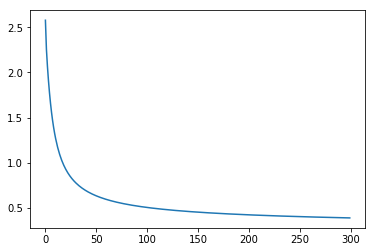

In [8]:
plt.plot(costs)

In [9]:
pred_y_train = pred_y.eval(feed_dict={X: mnist.train.images, y: mnist.train.labels})
(pred_y_train.argmax(axis=1) == mnist.train.labels.argmax(axis=1)).mean()

0.8948181818181818

In [10]:
pred_y_test = pred_y.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
(pred_y_test.argmax(axis=1) == mnist.test.labels.argmax(axis=1)).mean()

0.9013

In [11]:
w_val = w.eval()
w_val.shape

(784, 10)

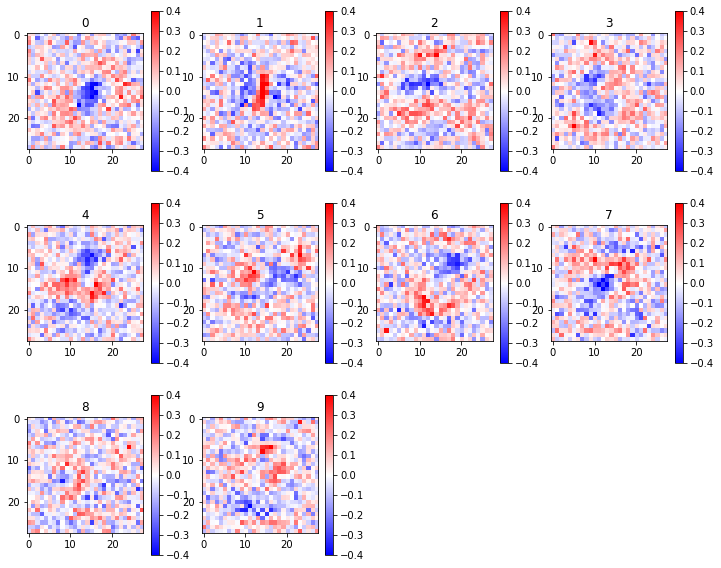

In [16]:
plt.figure(figsize=[12,10])
for i in range(10):
    plt.subplot(3,4,i+1)
    plt.imshow(w_val[:,i].reshape(28,28), cmap='bwr', vmin=-0.4, vmax=0.4)
    plt.colorbar()
    plt.title(i)

<img src='https://mmlind.github.io/images/1lnn_input.svg' />
(출처: https://mmlind.github.io/Simple_1-Layer_Neural_Network_for_MNIST_Handwriting_Recognition/)
> 그림에서 픽셀 갯수가 잘못 표기됨 (784가 맞음)

<img src='https://mmlind.github.io/images/1lnn_nnlayer.svg' />
(출처: https://mmlind.github.io/Simple_1-Layer_Neural_Network_for_MNIST_Handwriting_Recognition/)

- 픽셀 수가 784 이므로 속성 갯수가 784인 경우이다.
- w1, w2, w3, ..., w784, b
- w1\*x1 + w2\*x2 + ... + w784\*x784 + b

<img src='https://mmlind.github.io/images/1lnn_full.svg' />
(출처: https://mmlind.github.io/Simple_1-Layer_Neural_Network_for_MNIST_Handwriting_Recognition/)

### 분류 (중간층 적용)

In [17]:
X = tf.placeholder(tf.float32, shape=[None,784])
y = tf.placeholder(tf.float32, shape=[None,10])

w1 = tf.Variable(tf.random.normal([784,100], 0, 0.1))
b1 = tf.Variable(tf.random.normal([100], 0, 0.1))
y1 = tf.nn.relu(X@w1 + b1)

w2 = tf.Variable(tf.random.normal([100,10], 0, 0.1))
b2 = tf.Variable(tf.random.normal([10], 0, 0.1))
pred_y = y1@w2 + b2

entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = y,
                                                logits = pred_y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train_op = optimizer.minimize(entropy)

costs = []
tf.global_variables_initializer().run()

for i in range(1000):
    entropy_val, _ = sess.run([entropy, train_op],
                              feed_dict={X: mnist.train.images, y: mnist.train.labels})
    costs.append(entropy_val)
    if i%100==0: print(i, entropy_val)
        
print(i, entropy_val)

0 2.4240663
100 0.5405573
200 0.4070907
300 0.35640362
400 0.32598358
500 0.30388433
600 0.28614998
700 0.2712853
800 0.25846517
900 0.24720758
999 0.23722114


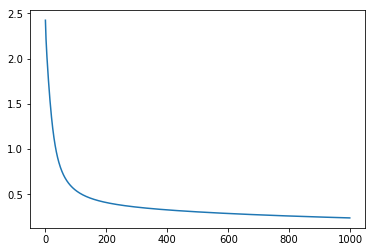

In [18]:
plt.plot(costs)

In [19]:
pred_y_train = pred_y.eval(feed_dict={X: mnist.train.images, y: mnist.train.labels})
(pred_y_train.argmax(axis=1) == mnist.train.labels.argmax(axis=1)).mean()

0.9326545454545454

In [20]:
pred_y_test = pred_y.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
(pred_y_test.argmax(axis=1) == mnist.test.labels.argmax(axis=1)).mean()

0.9324

In [21]:
w1_val = w1.eval()
w1_val.shape

(784, 100)

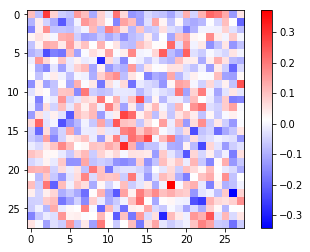

In [25]:
plt.imshow(w1_val[:,-1].reshape(28,28), cmap='bwr')
plt.colorbar()

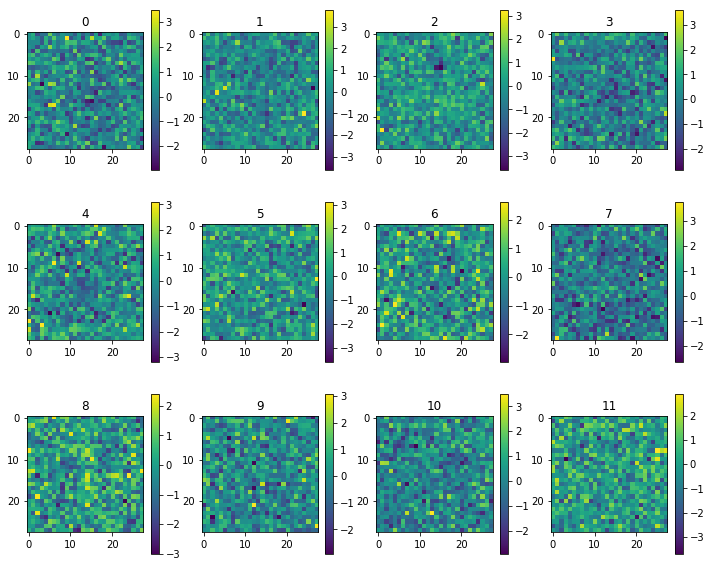

In [52]:
plt.figure(figsize=[12,10])
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(w1_val[:,i].reshape(28,28))
    plt.colorbar()
    plt.title(i)

In [26]:
w2_val = w2.eval()
w2_val.shape

(100, 10)

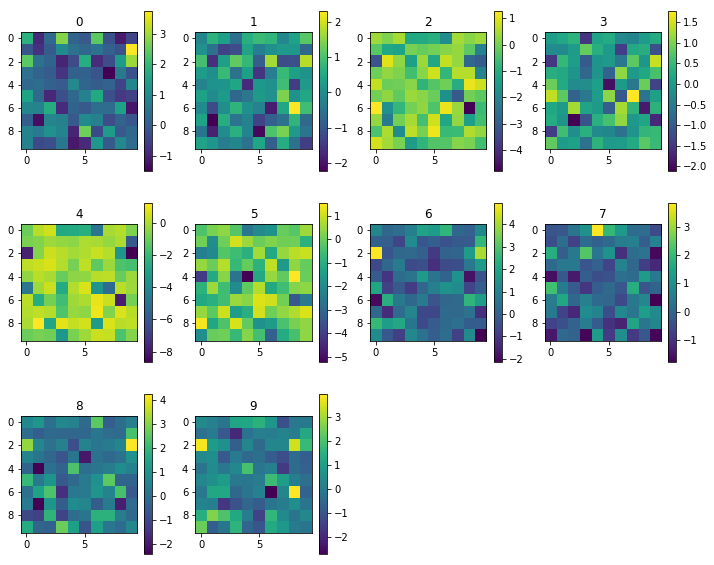

In [54]:
plt.figure(figsize=[12,10])
for i in range(10):
    plt.subplot(3,4,i+1)
    plt.imshow(w2_val[:,i].reshape(10,10))
    plt.colorbar()
    plt.title(i)

### 이미지 변환 결과

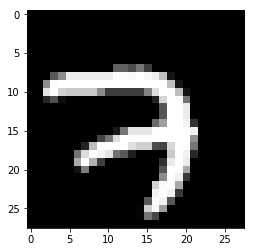

In [28]:
plt.imshow(mnist.train.images[0].reshape(28,28), cmap='gray')

In [31]:
result = y1.eval(feed_dict={X: mnist.train.images[0].reshape(1,-1)})
result.shape

(1, 100)

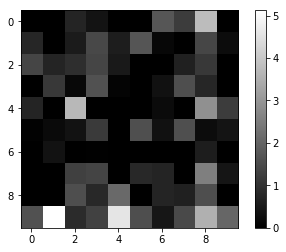

In [34]:
plt.imshow(result.reshape(10,10), cmap='gray')
plt.colorbar()

In [36]:
y1_org = X@w1 + b1
result2 = y1_org.eval(feed_dict={X: mnist.train.images[0].reshape(1,-1)})
result2.shape

(1, 100)

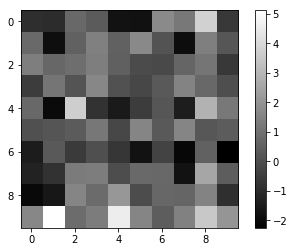

In [37]:
plt.imshow(result2.reshape(10,10), cmap='gray')
plt.colorbar()

### 연습문제
- 입력이 MNIST, 중간층이 뉴런 2개, 출력층이 MNIST(자기자신) 